<a href="https://colab.research.google.com/github/KevanReatha/bank_fraud_detection/blob/main/01_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phase	Description**
1. Data Access & Setup	✅ Done
2. EDA	Understand class imbalance, visualize distributions, find useful features
3. Preprocessing & Feature Engineering	Scaling, splitting, imbalance handling (SMOTE, etc.)
4. Modeling	Train/test multiple models (e.g., Logistic Regression, XGBoost)
5. Evaluation	Use metrics: F1, Recall, ROC-AUC, Confusion Matrix
6. (Optional) Deployment	Build a Streamlit app for interactive prediction
7. Polish Portfolio	Push to GitHub, write README, document findings clearly

**EDA**



Understand class imbalance, visualize distributions, find useful features

In [4]:
# Mount Google Drive (optional)
# from google.colab import drive
# drive.mount('/content/drive')

# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('./data/creditcard.csv')

# Preview
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


⚖️ Class Balance Check

Class
0    284315
1       492
Name: count, dtype: int64


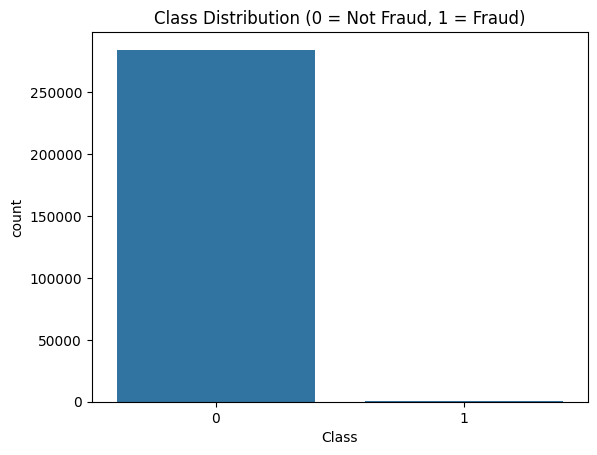

Fraudulent transactions: 0.1727%


In [5]:
# Count fraud vs non-fraud
print(df['Class'].value_counts())
sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0 = Not Fraud, 1 = Fraud)")
plt.show()

# Percentage of frauds
fraud_ratio = df['Class'].mean()
print(f"Fraudulent transactions: {fraud_ratio:.4%}")

💰 Distribution of Amount and Time

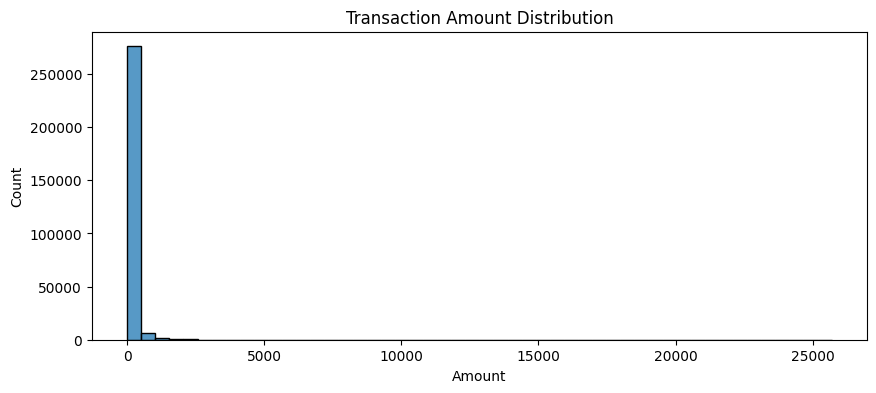

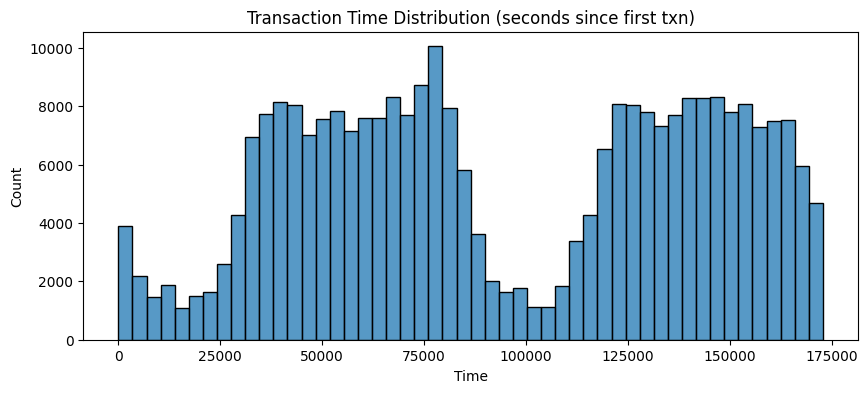

In [6]:
# Plot transaction amount
plt.figure(figsize=(10,4))
sns.histplot(df['Amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()

# Plot transaction time
plt.figure(figsize=(10,4))
sns.histplot(df['Time'], bins=50)
plt.title("Transaction Time Distribution (seconds since first txn)")
plt.show()

🔍 Correlation Heatmap

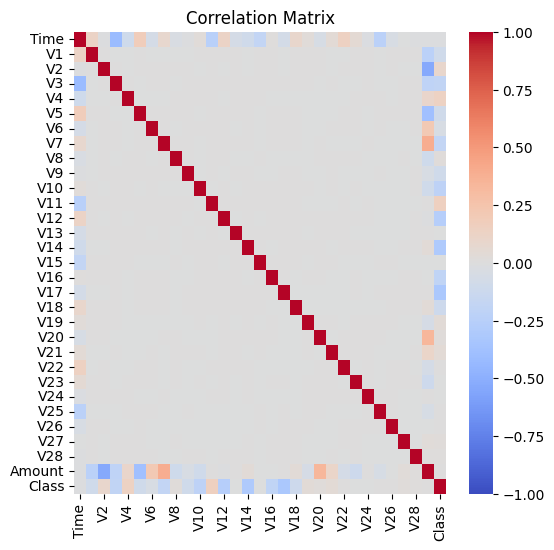

In [11]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0)
plt.title("Correlation Matrix")
plt.show()

🔢 1. Sort features by correlation with Class

In [13]:
correlations = df.corr()['Class'].drop('Class')
correlations_sorted = correlations.sort_values(ascending=False)
print("Top positively correlated:\n", correlations_sorted.head(5))
print("Top negatively correlated:\n", correlations_sorted.tail(5))

Top positively correlated:
 V11    0.154876
V4     0.133447
V2     0.091289
V21    0.040413
V19    0.034783
Name: Class, dtype: float64
Top negatively correlated:
 V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


📊 2. Plot distributions by class

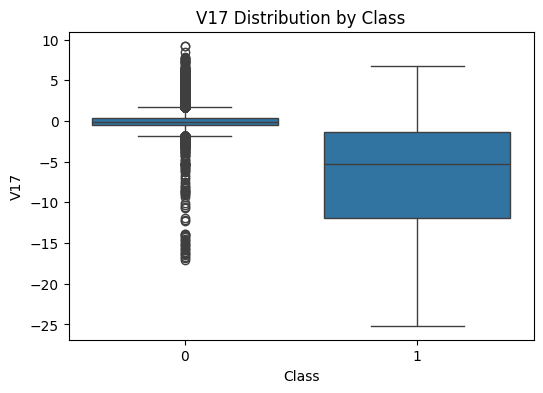

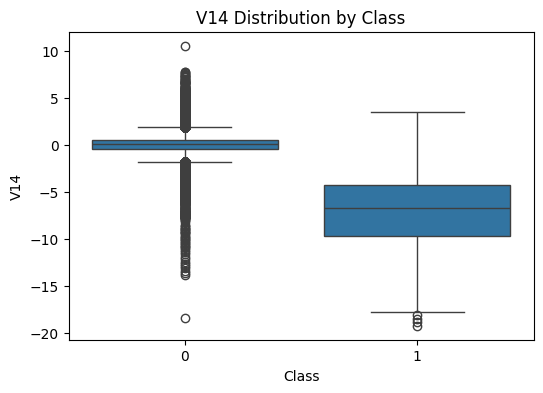

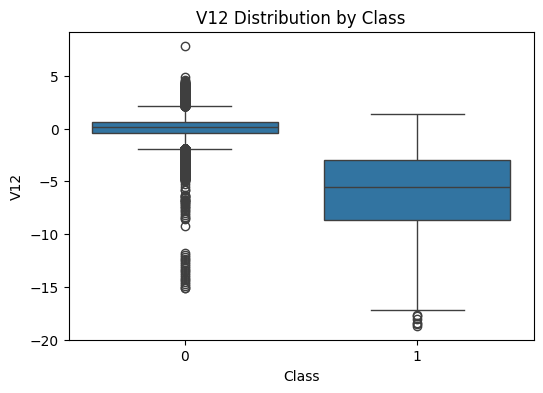

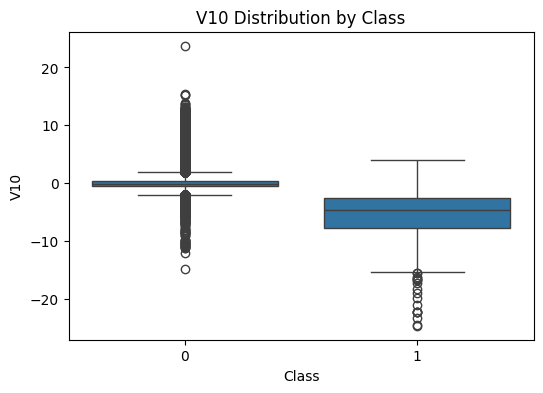

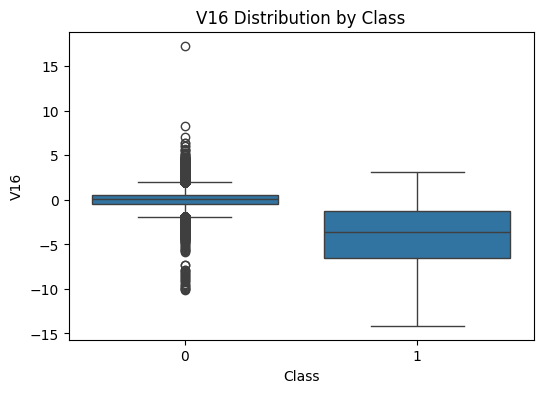

In [14]:
top_features = correlations.abs().sort_values(ascending=False).head(5).index.tolist()

for feature in top_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f"{feature} Distribution by Class")
    plt.show()

## ✅ Top Features to Keep (Based on EDA)

| Feature | Why It’s Valuable | Observations from Boxplots |
|---------|--------------------|-----------------------------|
| **V10** | 🔥 Very strong class separation | Fraudulent transactions have significantly lower values (often < -10), while normal ones cluster near 0. |
| **V12** | ✅ Good statistical distinction | Clear downward shift in fraud cases. Median for fraud is ~ -5 to -10, while non-fraud is near 0. |
| **V14** | ✅ Strong negative pattern | Fraud class is clearly lower and wider in spread compared to non-fraud. |
| **V17** | ✅ Distinctive spread | Fraud class shows wider, lower distribution; non-fraud is tightly centered around 0. |
| **V16** | 👍 Useful but slightly less distinct | Fraud transactions skew lower than non-fraud, though difference is less dramatic than V10 or V12. |

---

### 🧠 Why These Features Matter

- These features show **clear distribution differences** between fraud and non-fraud classes.
- This helps machine learning models learn to distinguish between classes.
- Even though features are PCA-transformed, those showing distinct patterns still carry predictive power.

**Note**: We keep all features for modeling but prioritize these for interpretation and feature importance evaluation.